<a href="https://colab.research.google.com/github/uniyalmani/DigitsClassificationMl/blob/main/DigitsClassificationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data() #numpy 28*28 grid for image

11490434/11490434 [==============================] - 0s 0us/step


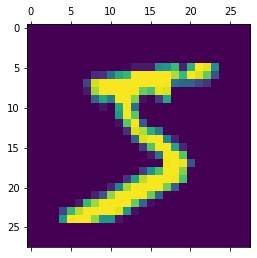

In [ ]:
plt.matshow(X_train[0]) 

In [ ]:
X_train_flattened = X_train.reshape(len(X_train), 28*28)/255 #flatning the grid 
X_test_flattened = X_test.reshape(len(X_test), 28*28)/255
print(len(X_train_flattened), len(y_train))

60000 60000


In [ ]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation="sigmoid") # input is shape 784, 0 and out put is 10
])                   
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )


In [ ]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.4716 - accuracy: 0.8770
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3036 - accuracy: 0.9150
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2832 - accuracy: 0.9213
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2733 - accuracy: 0.9234
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2666 - accuracy: 0.9252


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.2734 - accuracy: 0.9228


[0.2734443247318268, 0.9228000044822693]

In [ ]:
y_prediction = model.predict(X_test_flattened)
y_prediction[0]

313/313 [==============================] - 0s 1ms/step


array([2.4593035e-02, 2.8159678e-07, 5.1348329e-02, 9.6855235e-01,
       2.6223138e-03, 1.1047822e-01, 9.6474844e-07, 9.9975449e-01,
       9.2860892e-02, 6.8599057e-01], dtype=float32)

In [ ]:
y_prediction = [np.argmax(ele) for ele in y_prediction]

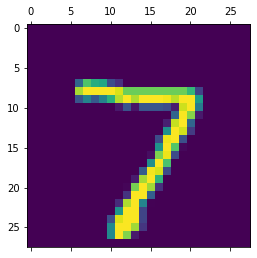

In [ ]:
plt.matshow(X_test[0]) 

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_prediction)
print(cm)

tf.Tensor(
[[ 961    0    1    2    0    5    8    2    1    0]
 [   0 1117    3    2    0    1    4    2    6    0]
 [   8   11  899   27   12    4   13   10   45    3]
 [   3    0   11  939    1   16    3    9   20    8]
 [   1    1    2    1  925    0   12    3    8   29]
 [   8    3    2   43   12  762   18    7   32    5]
 [  11    3    5    1    8   11  916    2    1    0]
 [   1   10   22   10   10    1    0  938    2   34]
 [   7   10    6   31    9   24   10   10  858    9]
 [  11    7    1   14   34    5    0   20    4  913]], shape=(10, 10), dtype=int32)


Text(69.0, 0.5, 'Truth')

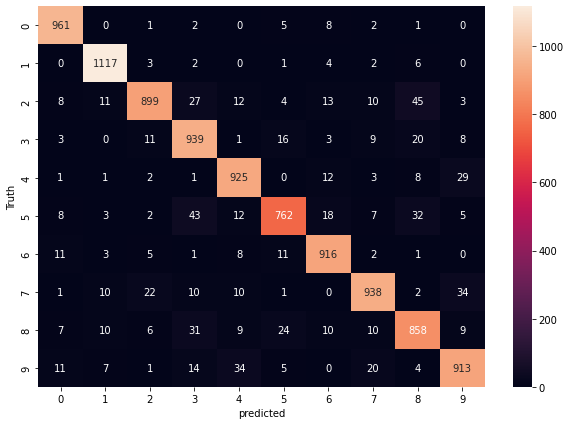

In [ ]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

# **Adding hidden layer to improve accuracy**

In [ ]:
#for saving lines of flatning we can use keras.layers.Flatten(input_shape=(28*28))
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation="relu") ,# first  layer need input shape , Dense(number of neurons in sec layer , input if layer is first layer, activation )
     keras.layers.Dense(10, activation="sigmoid") # second layer does not need input shape 
])                   
model.compile(optimizer="adam", 
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"]
              )


In [ ]:
model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2797 - accuracy: 0.9202
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1305 - accuracy: 0.9624
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0917 - accuracy: 0.9724
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0702 - accuracy: 0.9787
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0544 - accuracy: 0.9832


In [ ]:
model.evaluate(X_test_flattened, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0915 - accuracy: 0.9740


[0.0915280357003212, 0.9739999771118164]

In [ ]:
y_prediction = model.predict(X_test_flattened)
y_prediction[0]

313/313 [==============================] - 1s 3ms/step


array([1.2472873e-02, 1.3987428e-03, 1.1813249e-01, 9.8842299e-01,
       7.8801868e-06, 1.0779737e-01, 7.5416839e-10, 9.9999934e-01,
       6.8469583e-03, 3.4339890e-02], dtype=float32)

In [ ]:
y_prediction = [np.argmax(ele) for ele in y_prediction]

In [ ]:
cm = tf.math.confusion_matrix(labels=y_test, predictions=y_prediction)

Text(69.0, 0.5, 'Truth')

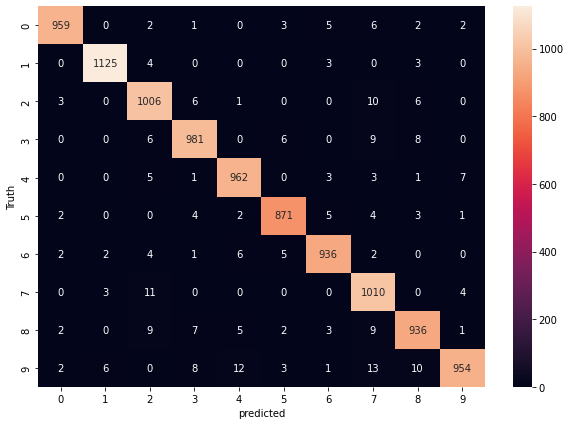

In [ ]:
import seaborn as sn
plt.figure(figsize=(10, 7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('predicted')
plt.ylabel('Truth')

In [ ]:
t = int(input())
for i in range(t):
  lst = input().split()
  print(lst)

1
1 2 3
['1', '2', '3']
